#MENTORAMA - MODULO 11 - Getting ML Models Online



###1: Linear regression and normal equation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
def random_data(sample_size=100):
  X = 2 * np.random.rand(sample_size, 1)
  y = 4 + 3 * X + np.random.randn(sample_size, 1)
  
  return X, y

In [4]:
X, y = random_data(500)
X.shape, y.shape


((500, 1), (500, 1))

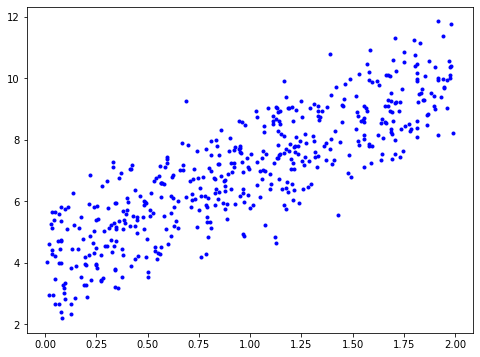

In [5]:
plt.figure(figsize=[8,6])
plt.plot(X, y, "b.")
plt.show()

In [6]:
# Finding the theta best manually

def normal_lin_reg(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  X_transposed = X.T
  XTX = X_transposed.dot(X)
  inverted = np.linalg.inv(XTX)
  theta_best = inverted.dot(X_transposed).dot(y)

  return theta_best

In [7]:
theta_best = normal_lin_reg(X, y)
theta_best

array([[4.04485881],
       [3.01106927]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.04485881],
       [10.06699734]])

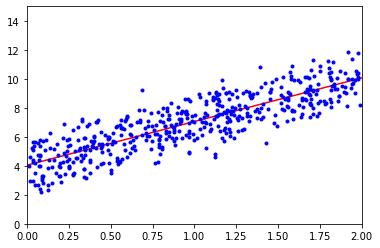

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
# Sklearn function to get theta best 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.04485881]), array([[3.01106927]]))

In [12]:
y_pred = lin_reg.predict(X_new)
y_pred

array([[ 4.04485881],
       [10.06699734]])

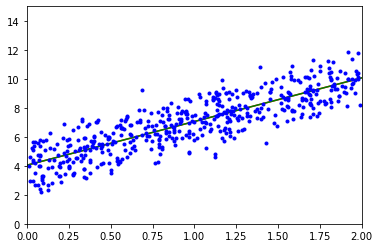

In [14]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X_new, y_pred, "g-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

###2: Gradient Descendent

In [17]:
def f(x):
  return x**2

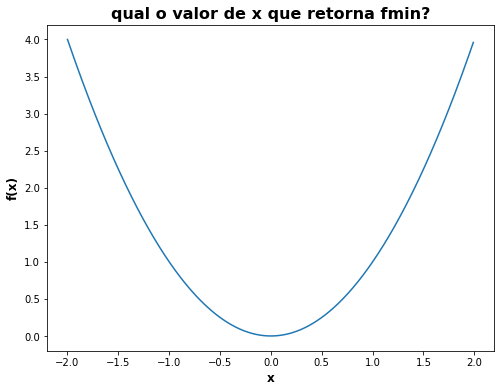

In [28]:
xlims = np.arange(-2, 2, 0.01)
fxlims = [f(x) for x in xlims]

plt.figure(figsize=[8,6])
plt.title('qual o valor de x que retorna fmin?', fontsize=16, fontweight='bold')
plt.xlabel('x', fontsize=12, fontweight='bold')
plt.ylabel('f(x)', fontsize=12, fontweight='bold')
plt.plot(xlims, fxlims, '-')
plt.show()

In [36]:
def learning_rate_steps(learning_rate=0.25, num_steps=10, initial_x=np.random.rand()):
  def gradient_f(x):
    return 2*x

  x_final = None

  for step in range(num_steps):
    if step == 0:
      x_final = initial_x
    else:
      x_final = x_final - learning_rate * gradient_f(x_final)
    print(f"Step {step} | x: {x_final} | f(x): {f(x_final)}")

In [39]:
learning_rate_steps()

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: 0.4602236376080893 | f(x): 0.21180579661322194
Step 2 | x: 0.23011181880404466 | f(x): 0.052951449153305484
Step 3 | x: 0.11505590940202233 | f(x): 0.013237862288326371
Step 4 | x: 0.057527954701011165 | f(x): 0.0033094655720815928
Step 5 | x: 0.028763977350505582 | f(x): 0.0008273663930203982
Step 6 | x: 0.014381988675252791 | f(x): 0.00020684159825509955
Step 7 | x: 0.007190994337626396 | f(x): 5.171039956377489e-05
Step 8 | x: 0.003595497168813198 | f(x): 1.2927599890943722e-05
Step 9 | x: 0.001797748584406599 | f(x): 3.2318999727359304e-06


In [32]:
1.220901870727539e-05 < 0.0001

True

In [40]:
learning_rate_steps(0.01, 100)

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: 0.902038329711855 | f(x): 0.8136731482693533
Step 2 | x: 0.8839975631176179 | f(x): 0.7814516915978869
Step 3 | x: 0.8663176118552656 | f(x): 0.7505062046106106
Step 4 | x: 0.8489912596181602 | f(x): 0.7207861589080303
Step 5 | x: 0.8320114344257971 | f(x): 0.6922430270152724
Step 6 | x: 0.8153712057372812 | f(x): 0.6648302031454677
Step 7 | x: 0.7990637816225356 | f(x): 0.6385029271009072
Step 8 | x: 0.7830825059900849 | f(x): 0.6132182111877114
Step 9 | x: 0.7674208558702832 | f(x): 0.588934770024678
Step 10 | x: 0.7520724387528775 | f(x): 0.5656129531317008
Step 11 | x: 0.73703098997782 | f(x): 0.5432146801876855
Step 12 | x: 0.7222903701782636 | f(x): 0.521703378852253
Step 13 | x: 0.7078445627746983 | f(x): 0.5010439250497039
Step 14 | x: 0.6936876715192043 | f(x): 0.4812025856177355
Step 15 | x: 0.6798139180888202 | f(x): 0.4621469632272731
Step 16 | x: 0.6662176397270438 | f(x): 0.44384594348347317
Step 17 | x

In [42]:
learning_rate_steps(2, 10)

Step 0 | x: 0.9204472752161786 | f(x): 0.8472231864528877
Step 1 | x: -2.761341825648536 | f(x): 7.62500867807599
Step 2 | x: 8.284025476945608 | f(x): 68.62507810268391
Step 3 | x: -24.852076430836824 | f(x): 617.6257029241552
Step 4 | x: 74.55622929251047 | f(x): 5558.631326317395
Step 5 | x: -223.6686878775314 | f(x): 50027.68193685656
Step 6 | x: 671.0060636325942 | f(x): 450249.13743170904
Step 7 | x: -2013.0181908977825 | f(x): 4052242.236885381
Step 8 | x: 6039.054572693347 | f(x): 36470180.13196842
Step 9 | x: -18117.16371808004 | f(x): 328231621.18771577


In [44]:
X.shape, y.shape

((500, 1), (500, 1))

In [48]:
from sklearn.metrics import mean_squared_error

def mse(ytrue, ypred):
  return mean_squared_error(y_true=ytrue, y_pred=ypred)

In [49]:
learning_rate = 0.0075
num_steps = 200

m = X.shape[0]
k = X.shape[1]

theta = np.random.randn(k + 1, 1)
X_b = np.c_[np.ones((m, 1)), X]

for step in range(num_steps):
  print(f'step: {step}')
  print(f'theta: {theta.reshape(-1, 1)}')

  gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)

  theta = theta - learning_rate * gradients

  ypred_step = X_b.dot(theta)
  mse_step = mse(y, ypred_step)

  print(f'MSE: {mse_step}')
  print('-'*60)

step: 0
theta: [[0.74264957]
 [0.60320924]]
MSE: 32.53064248581662
------------------------------------------------------------
step: 1
theta: [[0.82708123]
 [0.69632125]]
MSE: 30.58593557881393
------------------------------------------------------------
step: 2
theta: [[0.90889689]
 [0.78645967]]
MSE: 28.761835544454883
------------------------------------------------------------
step: 3
theta: [[0.98817889]
 [0.87371832]]
MSE: 27.05086076661093
------------------------------------------------------------
step: 4
theta: [[1.06500696]
 [0.95818802]]
MSE: 25.44599374514148
------------------------------------------------------------
step: 5
theta: [[1.13945835]
 [1.03995676]]
MSE: 23.94065230479734
------------------------------------------------------------
step: 6
theta: [[1.21160784]
 [1.11910974]]
MSE: 22.52866259015905
------------------------------------------------------------
step: 7
theta: [[1.28152788]
 [1.19572949]]
MSE: 21.204233735814615
-----------------------------------

In [50]:
normal_lin_reg(X, y)

array([[4.04485881],
       [3.01106927]])

In [69]:
class regLinear():
  def __init__(self, learning_rate, num_steps):
    self.learning_rate = learning_rate
    self.num_steps = num_steps

  def fit(self, X, y):
    y = y.reshape(-1, 1)
    m = X.shape[0]
    k = X.shape[1]
    theta = np.random.randn(k + 1, 1)
    X_b = np.c_[np.ones((m, 1)), X]

    for step in range(num_steps):
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
      theta = theta - self.learning_rate * gradients

    self.final_theta = theta
    print('Model trained')

  def predict(self, X):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    preds = X_b.dot(self.final_theta)
    return preds


In [70]:
rg = regLinear(learning_rate=0.075, num_steps=200)

In [71]:
rg.fit(X, y)

Model trained


In [72]:
rg.final_theta

array([[4.04254045],
       [3.01310402]])

In [73]:
rg.predict(X)

array([[ 7.23233816],
       [ 6.91479833],
       [ 6.19436222],
       [ 4.41648374],
       [ 5.30917834],
       [ 5.43872417],
       [ 7.58912354],
       [ 7.19738714],
       [ 6.14697922],
       [ 6.07277181],
       [ 7.76663108],
       [ 4.75777956],
       [ 7.68692062],
       [ 5.20782096],
       [ 8.23088554],
       [ 5.74133461],
       [ 7.58751595],
       [ 6.89103639],
       [ 4.95968069],
       [ 8.32009758],
       [ 5.25212873],
       [ 9.57292267],
       [ 8.72274509],
       [ 7.68588758],
       [ 7.6427218 ],
       [ 7.15213231],
       [ 9.82002961],
       [ 5.08725877],
       [ 5.12406964],
       [ 5.5782376 ],
       [ 4.24446109],
       [ 7.23263575],
       [ 9.15742328],
       [ 9.12984484],
       [ 5.3708375 ],
       [ 9.18886107],
       [ 5.74686164],
       [ 8.92199006],
       [ 5.55182713],
       [ 4.7930334 ],
       [ 6.11302189],
       [ 9.05279817],
       [ 7.61745611],
       [ 7.3922482 ],
       [ 4.46351069],
       [ 5

In [74]:
lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_, lm.coef_)
print()
lm.predict(X)

[4.04485881] [[3.01106927]]



array([[ 7.23250244],
       [ 6.91517705],
       [ 6.19522745],
       [ 4.41854957],
       [ 5.31064133],
       [ 5.44009968],
       [ 7.58904689],
       [ 7.19757503],
       [ 6.14787644],
       [ 6.07371914],
       [ 7.76643456],
       [ 4.75961491],
       [ 7.68677792],
       [ 5.2093524 ],
       [ 8.23037551],
       [ 5.74250576],
       [ 7.58744038],
       [ 6.89143115],
       [ 4.9613797 ],
       [ 8.31952729],
       [ 5.25363025],
       [ 9.57150636],
       [ 8.7219029 ],
       [ 7.68574558],
       [ 7.64260895],
       [ 7.15235076],
       [ 9.81844642],
       [ 5.08887162],
       [ 5.12565763],
       [ 5.57951889],
       [ 4.24664308],
       [ 7.23279983],
       [ 9.15628755],
       [ 9.12872774],
       [ 5.37225885],
       [ 9.18770411],
       [ 5.74802906],
       [ 8.92101332],
       [ 5.55312626],
       [ 4.79484494],
       [ 6.11394205],
       [ 9.05173309],
       [ 7.61736032],
       [ 7.39230449],
       [ 4.46554476],
       [ 5

In [83]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, eta0=0.1, max_iter=50)
sgd_reg.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [84]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0550152]), array([3.04156737]))

###4: Polinomial Regression